In [23]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [24]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [25]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_chroma_stft.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_chroma_stft.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_chroma_stft.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_chroma_stft.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [27]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [28]:
X_test = X_test.iloc[:,1:2]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 1, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [29]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 1, 128)        

In [30]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 1, 128)        

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 1, 1), (4233, 1, 1, 1), (4499, 10), (4233, 10))

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 250
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_chroma_stft = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/250
18/18 [==============================] - 2s 41ms/step - loss: 2.1004 - accuracy: 0.2096 - val_loss: 2.2935 - val_accuracy: 0.1441

Epoch 00001: val_loss improved from inf to 2.29348, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/250
18/18 [==============================] - 1s 36ms/step - loss: 2.0232 - accuracy: 0.2267 - val_loss: 2.2924 - val_accuracy: 0.1547

Epoch 00002: val_loss improved from 2.29348 to 2.29240, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 3/250
18/18 [==============================] - 1s 40ms/step - loss: 2.0020 - accuracy: 0.2238 - val_loss: 2.2904 - val_accuracy: 0.1663

Epoch 00003: val_loss improved from 2.29240 to 2.29043, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 4/250
18/18 [==============================] - 1s 42ms/step - loss: 1.9980 - accuracy: 0.2229 - val_loss: 2.2883 - val_accuracy: 0.1344

Epoch 00004: val_loss improved from 2.29043 to 2.28833, saving model to saved_models\weights.


Epoch 00033: val_loss improved from 2.08784 to 2.08479, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 34/250
18/18 [==============================] - 1s 38ms/step - loss: 1.9393 - accuracy: 0.2498 - val_loss: 2.0809 - val_accuracy: 0.1899

Epoch 00034: val_loss improved from 2.08479 to 2.08094, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 35/250
18/18 [==============================] - 1s 39ms/step - loss: 1.9414 - accuracy: 0.2449 - val_loss: 2.0723 - val_accuracy: 0.1859

Epoch 00035: val_loss improved from 2.08094 to 2.07230, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 36/250
18/18 [==============================] - 1s 34ms/step - loss: 1.9411 - accuracy: 0.2429 - val_loss: 2.0669 - val_accuracy: 0.2065

Epoch 00036: val_loss improved from 2.07230 to 2.06686, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 37/250
18/18 [==============================] - 1s 35ms/step - loss: 1.9389 - accuracy: 0.2449 - val_loss: 2.

18/18 [==============================] - 1s 38ms/step - loss: 1.9307 - accuracy: 0.2518 - val_loss: 2.0798 - val_accuracy: 0.2034

Epoch 00073: val_loss did not improve from 2.05550
Epoch 74/250
18/18 [==============================] - 1s 40ms/step - loss: 1.9324 - accuracy: 0.2525 - val_loss: 2.0913 - val_accuracy: 0.2084

Epoch 00074: val_loss did not improve from 2.05550
Epoch 75/250
18/18 [==============================] - 1s 38ms/step - loss: 1.9335 - accuracy: 0.2454 - val_loss: 2.0770 - val_accuracy: 0.2114

Epoch 00075: val_loss did not improve from 2.05550
Epoch 76/250
18/18 [==============================] - 1s 38ms/step - loss: 1.9303 - accuracy: 0.2487 - val_loss: 2.0772 - val_accuracy: 0.2025

Epoch 00076: val_loss did not improve from 2.05550
Epoch 77/250
18/18 [==============================] - 1s 38ms/step - loss: 1.9298 - accuracy: 0.2518 - val_loss: 2.0979 - val_accuracy: 0.2147

Epoch 00077: val_loss did not improve from 2.05550
Epoch 78/250
18/18 [==================

18/18 [==============================] - 1s 36ms/step - loss: 1.9222 - accuracy: 0.2541 - val_loss: 2.0928 - val_accuracy: 0.2171

Epoch 00115: val_loss did not improve from 2.05550
Epoch 116/250
18/18 [==============================] - 1s 39ms/step - loss: 1.9255 - accuracy: 0.2501 - val_loss: 2.0869 - val_accuracy: 0.2121

Epoch 00116: val_loss did not improve from 2.05550
Epoch 117/250
18/18 [==============================] - 1s 41ms/step - loss: 1.9273 - accuracy: 0.2578 - val_loss: 2.0892 - val_accuracy: 0.2058

Epoch 00117: val_loss did not improve from 2.05550
Epoch 118/250
18/18 [==============================] - 1s 39ms/step - loss: 1.9255 - accuracy: 0.2536 - val_loss: 2.1008 - val_accuracy: 0.2001

Epoch 00118: val_loss did not improve from 2.05550
Epoch 119/250
18/18 [==============================] - 1s 40ms/step - loss: 1.9260 - accuracy: 0.2543 - val_loss: 2.0862 - val_accuracy: 0.2095

Epoch 00119: val_loss did not improve from 2.05550
Epoch 120/250
18/18 [=============

18/18 [==============================] - 1s 43ms/step - loss: 1.9199 - accuracy: 0.2536 - val_loss: 2.0928 - val_accuracy: 0.2084

Epoch 00157: val_loss did not improve from 2.05550
Epoch 158/250
18/18 [==============================] - 1s 46ms/step - loss: 1.9189 - accuracy: 0.2534 - val_loss: 2.0897 - val_accuracy: 0.2065

Epoch 00158: val_loss did not improve from 2.05550
Epoch 159/250
18/18 [==============================] - 1s 41ms/step - loss: 1.9184 - accuracy: 0.2556 - val_loss: 2.0991 - val_accuracy: 0.2041

Epoch 00159: val_loss did not improve from 2.05550
Epoch 160/250
18/18 [==============================] - 1s 37ms/step - loss: 1.9214 - accuracy: 0.2541 - val_loss: 2.0973 - val_accuracy: 0.2048

Epoch 00160: val_loss did not improve from 2.05550
Epoch 161/250
18/18 [==============================] - 1s 38ms/step - loss: 1.9198 - accuracy: 0.2581 - val_loss: 2.0911 - val_accuracy: 0.2088

Epoch 00161: val_loss did not improve from 2.05550
Epoch 162/250
18/18 [=============


Epoch 00198: val_loss did not improve from 2.05550
Epoch 199/250
18/18 [==============================] - 1s 39ms/step - loss: 1.9158 - accuracy: 0.2549 - val_loss: 2.1134 - val_accuracy: 0.2072

Epoch 00199: val_loss did not improve from 2.05550
Epoch 200/250
18/18 [==============================] - 1s 41ms/step - loss: 1.9218 - accuracy: 0.2561 - val_loss: 2.0896 - val_accuracy: 0.2065

Epoch 00200: val_loss did not improve from 2.05550
Epoch 201/250
18/18 [==============================] - 1s 43ms/step - loss: 1.9184 - accuracy: 0.2587 - val_loss: 2.1056 - val_accuracy: 0.2069

Epoch 00201: val_loss did not improve from 2.05550
Epoch 202/250
18/18 [==============================] - 1s 44ms/step - loss: 1.9228 - accuracy: 0.2569 - val_loss: 2.1029 - val_accuracy: 0.2112

Epoch 00202: val_loss did not improve from 2.05550
Epoch 203/250
18/18 [==============================] - 1s 43ms/step - loss: 1.9210 - accuracy: 0.2485 - val_loss: 2.1008 - val_accuracy: 0.2022

Epoch 00203: val_lo


Epoch 00240: val_loss did not improve from 2.05550
Epoch 241/250
18/18 [==============================] - 1s 38ms/step - loss: 1.9141 - accuracy: 0.2547 - val_loss: 2.1044 - val_accuracy: 0.2091

Epoch 00241: val_loss did not improve from 2.05550
Epoch 242/250
18/18 [==============================] - 1s 39ms/step - loss: 1.9148 - accuracy: 0.2483 - val_loss: 2.1097 - val_accuracy: 0.2051

Epoch 00242: val_loss did not improve from 2.05550
Epoch 243/250
18/18 [==============================] - 1s 42ms/step - loss: 1.9219 - accuracy: 0.2487 - val_loss: 2.1016 - val_accuracy: 0.2112

Epoch 00243: val_loss did not improve from 2.05550
Epoch 244/250
18/18 [==============================] - 1s 40ms/step - loss: 1.9146 - accuracy: 0.2541 - val_loss: 2.1176 - val_accuracy: 0.2008

Epoch 00244: val_loss did not improve from 2.05550
Epoch 245/250
18/18 [==============================] - 1s 40ms/step - loss: 1.9213 - accuracy: 0.2538 - val_loss: 2.1056 - val_accuracy: 0.2006

Epoch 00245: val_lo

In [34]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.2587241530418396
Testing Accuracy:  0.2064729481935501


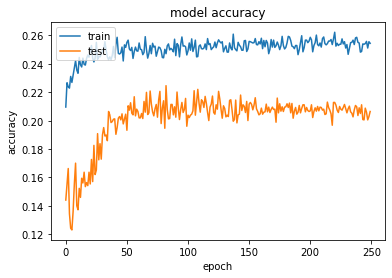

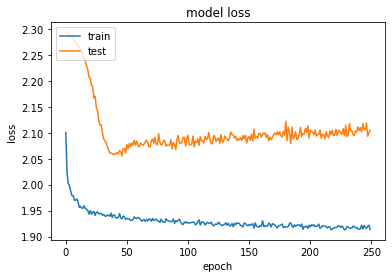

In [35]:
# summarize history for accuracy
plt.plot(model_chroma_stft.history['accuracy'])
plt.plot(model_chroma_stft.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_chroma_stft.history['loss'])
plt.plot(model_chroma_stft.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
#Avg Test accuracy and Standart Devision 

In [37]:
train_hist = pd.DataFrame(model_chroma_stft.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.100439,0.209602,2.293478,0.144106
1,2.023196,0.226717,2.292404,0.154737
2,2.001981,0.223828,2.290432,0.166312
3,1.998005,0.222938,2.288332,0.134420
4,1.987934,0.231162,2.285799,0.124262
...,...,...,...,...
245,1.917800,0.254279,2.105629,0.208835
246,1.915955,0.255835,2.118458,0.206000
247,1.919771,0.251167,2.093212,0.200567
248,1.921936,0.255612,2.099977,0.202929


In [38]:
print(train_hist["val_accuracy"].describe())

count    250.000000
mean       0.201116
std        0.018186
min        0.123081
25%        0.201748
50%        0.206355
75%        0.209957
max        0.224663
Name: val_accuracy, dtype: float64


In [39]:
#checking part

In [41]:
test_hist_avg = pd.DataFrame(model_chroma_stft.history).mean()
test_hist_avg

loss            1.930070
accuracy        0.250836
val_loss        2.105739
val_accuracy    0.201116
dtype: float64

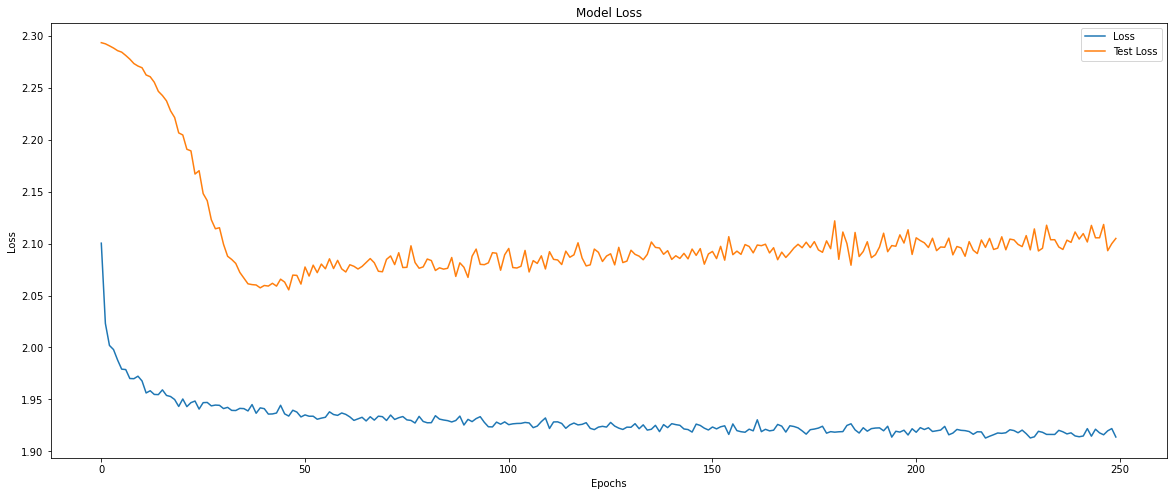

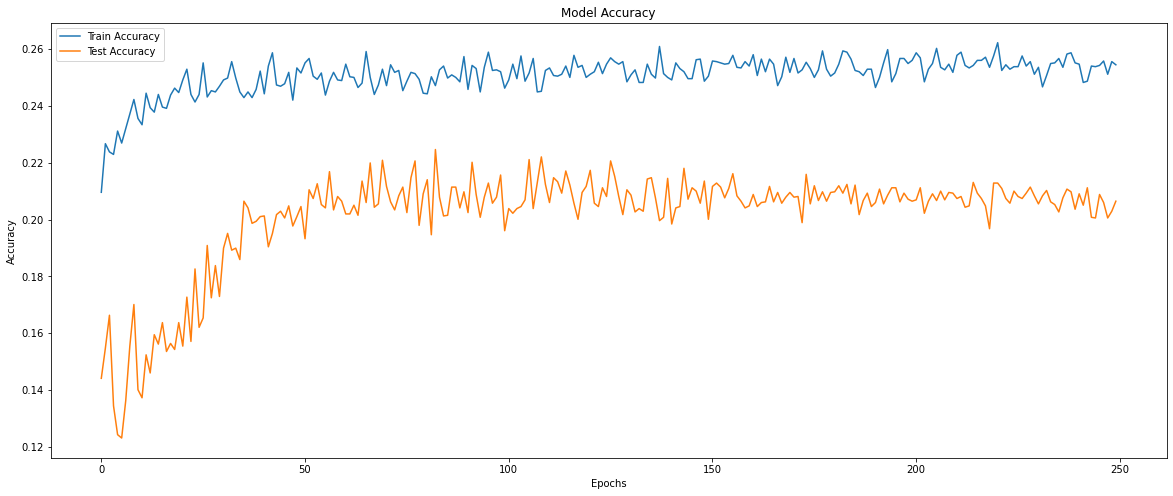

In [42]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [43]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 72   0 100  59  49  40   3 127  47   3]
 [  0   0  28  43   7   0   0  11 100  32]
 [  4   0 108 138  69   1   0 106  56  18]
 [  0   0 116 126  51   1   0  72 110  24]
 [  3   0  99  46  71  15   3 226  28   9]
 [ 23   0  43  82  90  21   9 188  22   5]
 [ 23   0   3   3   3  17  22 107   5   1]
 [ 21   0  68  31  66  25   7 215  18   1]
 [  1   0  35  73  41   2   0  27 185  29]
 [  0   0  60 166  20   0   0  24 176  54]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.49      0.14      0.22       500
           1       0.00      0.00      0.00       221
           2       0.16      0.22      0.19       500
           3       0.16      0.25      0.20       500
           4       0.15      0.14      0.15       500
           5       0.17      0.04      0.07       483
           6       0.50      0.12      0.19       184
           7       0.19      0.48      0.28       452
           8       0.25      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta